# Analyse décès sur le territoire Français

Une analyse des impacts globaux du covid en s'abstrayant des biais de tests

In [3]:
# Generic imports
import pandas as pd
import matplotlib.pyplot as plt

## data crunching

In [14]:
# Data from insee
# https://insee.fr/fr/information/4470857
insee_file = "2020-04-05_deces_quotidiens_departement_csv.csv"
df_insee = pd.read_csv("./Data_FR_Deaths/" + insee_file, delimiter=";", index_col="Date_evenement")
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/03/2020,France,1624.0,1774.0,1708,1872,1928,2136
02/03/2020,France,3261.0,3551.0,3467,3782,3933,4327
03/03/2020,France,4888.0,5309.0,5035,5530,5881,6455
04/03/2020,France,6564.0,7109.0,6747,7410,7768,8545
05/03/2020,France,8187.0,8875.0,8455,9278,9770,10746
...,...,...,...,...,...,...,...
26/04/2020,Dept_976,NaN,NaN,135,135,103,103
27/04/2020,Dept_976,NaN,NaN,138,138,105,105
28/04/2020,Dept_976,NaN,NaN,143,143,107,107


### Vérification de l'intégrité des sommes

In [17]:
check = df_insee[df_insee.loc[:,"Zone"]=="France"]

In [21]:
check_2 = df_insee[df_insee.loc[:,"Zone"]!="France"].groupby('Date_evenement').sum()

In [22]:
check_2

,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,
01/03/2020,1624.0,1774.0,1708,1872,1928,2136
01/04/2020,60253.0,65217.0,50489,55319,56559,62189
02/03/2020,3261.0,3551.0,3467,3782,3933,4327
02/04/2020,62664.0,67827.0,52046,57020,58114,63904
03/03/2020,4888.0,5309.0,5035,5530,5881,6455
...,...,...,...,...,...,...
29/03/2020,52713.0,57067.0,46009,50375,51728,56836
29/04/2020,0.0,0.0,92495,101226,99472,109279
30/03/2020,55183.0,59725.0,47484,52012,53365,58641


In [36]:
check_3 = check.join(check_2, rsuffix="_sum",)[["Total_deces_2020","Total_deces_2019","Total_deces_2018", "Total_deces_2020_sum","Total_deces_2019_sum","Total_deces_2018_sum"]]

In [33]:
(check_3["Total_deces_2020"]-check_3["Total_deces_2020_sum"]).describe()

count    51.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [34]:
(check_3["Total_deces_2019"]-check_3["Total_deces_2019_sum"]).describe()

count    61.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [37]:
(check_3["Total_deces_2018"]-check_3["Total_deces_2018_sum"]).describe()

count    61.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

### filtrage et reformation du df insee

In [49]:
df_insee = df_insee[df_insee["Zone"]=="France"][["Total_deces_2020","Total_deces_2019","Total_deces_2018"]]

In [58]:
df_insee.columns=[2020,2019,2018]
df_insee.sort_index(axis=1,inplace=True)

In [74]:
# our main dataframe to compile all data 2020 and before 
df_wp = df_insee.diff()
df_wp.index = pd.to_datetime(df_wp.index, dayfirst=True)

In [84]:
df_wp.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [85]:
df_wp

,2018,2019,2020
Date_evenement,,,
2020-03-01,2136.0,1872.0,1774.0
2020-03-02,2191.0,1910.0,1777.0
2020-03-03,2128.0,1748.0,1758.0
2020-03-04,2090.0,1880.0,1800.0
2020-03-05,2201.0,1868.0,1766.0
...,...,...,...
2020-04-26,1557.0,1620.0,NaN
2020-04-27,1569.0,1562.0,NaN
2020-04-28,1583.0,1589.0,NaN


## Comparaison décès par jour 2020 vs références

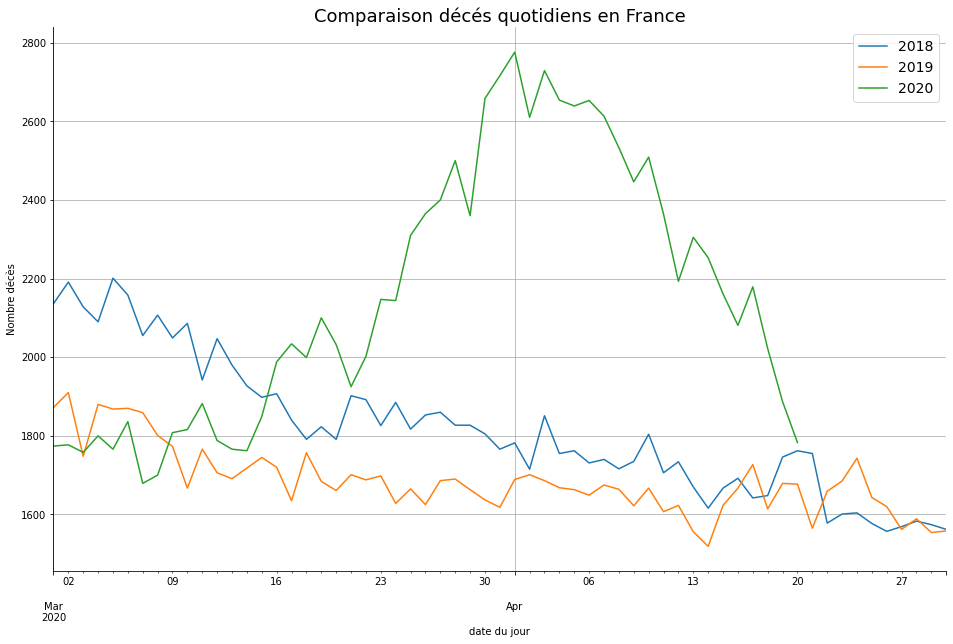

In [88]:
# courbe 2020
ax = df_wp.plot(kind="line", figsize=(16,10))

plt.title("Comparaison décés quotidiens en France", fontsize=18)
plt.xlabel("date du jour")
plt.ylabel("Nombre décès")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig("deces.png")
plt.show()